- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [165]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning
warnings.filterwarnings('ignore') # inibe a exibição de avisos de warning

In [166]:
# modelos de classificação
from sklearn.linear_model import LogisticRegression # estimar a probabilidade de um determinado resultado com base em variáveis independentes
from sklearn.tree import DecisionTreeClassifier # usado tanto para classificação binária quanto multiclass, permitindo a previsão de rótulos variados
from sklearn.neighbors import KNeighborsClassifier # classificador que implementa o voto dos k-vizinhos mais próximos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # classificador com uma fronteira de decisão linear, ajustando as densidades condicionais das classes aos dados e utilizando a regra de Bayes
from sklearn.naive_bayes import GaussianNB # algoritmo de classificação probabilístico que se baseia no teorema de Bayes
from sklearn.svm import SVC # utilizado para classificação, que baseia-se na criação de um hiperplano em um espaço de múltiplas dimensões para separar diferentes classes
from sklearn.neural_network import MLPClassifier # utiliza uma rede neural de múltiplas camadas, e é especialmente otimizado para a função de log-loss utilizando técnicas como LBFGS ou descida de gradiente estocástico
from sklearn.ensemble import AdaBoostClassifier # aprendizado supervisionado não paramétrico utilizado para classificação, que cria um modelo preditivo com base em classificadores simples
from sklearn.ensemble import GradientBoostingClassifier # cria um modelo aditivo de forma progressiva, permitindo a otimização de funções de perda diferenciáveis. É eficaz para problemas de classificação
from sklearn.ensemble import RandomForestClassifier # utiliza uma combinação de várias árvores de decisão para realizar tarefas de classificação, melhorando a precisão dos resultados
from sklearn.ensemble import ExtraTreesClassifier # classificador de árvores de decisão extremamente aleatórias, que se diferencia das árvores de decisão tradicionais ao construir múltiplas árvores de forma aleatória

In [167]:
# modelos de aprendizado profundo
from keras.models import Sequential # permite agrupar uma pilha linear de camadas em um modelo, facilitando a construção de redes neurais
from keras.layers import Dense # camada fundamental em redes neurais, onde cada neurônio está conectado a todos os neurônios da camada anterior, o que a torna amplamente utilizada em redes de múltiplas camadas
from keras.optimizers import SGD # otimizador usado em Keras que atualiza os parâmetros com base no gradiente e na taxa de aprendizado definida
from scikeras.wrappers import KerasClassifier # permite usar modelos Keras em bibliotecas como scikit-learn, facilitando a integração com técnicas como validação cruzada e ajuste de hiperparâmetros
from tensorflow.keras.optimizers import Adam # método de descida de gradiente estocástico que usa estimativas adaptativas de momentos de primeira e segunda ordem

In [168]:
# análise de dados e avaliação dos modelos
from sklearn.model_selection import train_test_split # utilizada para dividir conjuntos de dados em subconjuntos de treino e teste, ajudando na validação de modelos
from sklearn.model_selection import KFold # técnica de validação cruzada que divide um conjunto de dados em 'k' subconjuntos (folds) para treinar e testar modelos, garantindo que cada exemplo seja usado para treinamento e teste
from sklearn.model_selection import cross_val_score # avalia o desempenho de um estimador usando validação cruzada. Ela divide os dados em k partes e treina o modelo k vezes
from sklearn.model_selection import GridSearchCV # realizar uma busca exaustiva sobre combinações de parâmetros especificados para um estimador. Ele ajuda a otimizar o desempenho do modelo
from sklearn.metrics import classification_report # resume a precisão e outras métricas de desempenho dos modelos de classificação em um formato de texto detalhado
from sklearn.metrics import confusion_matrix # tabela que é usada em problemas de classificação para avaliar onde ocorreram erros no modelo, com as linhas representando as classes reais e as colunas as classes previstas
from sklearn.metrics import accuracy_score # métrica utilizada para avaliar o desempenho de modelos de classificação, representando a fração de previsões corretas em relação ao total de previsões feitas

In [169]:
# preparação e visualização de dados
import numpy as np # computaçaõ de matrizes
from matplotlib import pyplot # plotagem gráfica

In [170]:
# carregando arquivo tratado em dataframe
df_emprestimo_trans = pd.read_csv('df_treated/df_emprestimo_trans.csv')

In [171]:
# conferindo a dimensão do dataframe, linhas e colunas
df_emprestimo_trans.shape

(8815, 34)

In [172]:
# ordenando pelo index o dataframe carregado
df_emprestimo_trans = df_emprestimo_trans.sort_index()

In [173]:
# reconhecendo as primeiras linhas do df
df_emprestimo_trans.head(5)

,utilizacao,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,saldo_rotativo,tx_util_credito,tx_juros_faixa,vr_parcelas_faixa,log_renda_anual_faixa,idx_div_renda_faixa,pont_mutuario_faixa,log_saldo_rotativo,log_saldo_rotativo_faixa,tx_util_credito_faixa,devedor,atende_criterios,consult_mutuario_cred,nro_reg_deprec,0-1__utilizacao_all_other,0-1__utilizacao_credit_card,0-1__utilizacao_debt_consolidation,0-1__utilizacao_educational,0-1__utilizacao_home_improvement,0-1__utilizacao_major_purchase,0-1__utilizacao_small_business,ord__tx_juros_faixa,ord__vr_parcelas_faixa,ord__log_renda_anual_faixa,ord__idx_div_renda_faixa,ord__pont_mutuario_faixa,ord__log_saldo_rotativo_faixa,ord__tx_util_credito_faixa
0,debt_consolidation,12.0,829.0,11.0,19.0,802.0,28854.0,52.1,"(10.0, 12.0]","(780.0, 910.0]","(10.0, 11.0]","(18.0, 19.0]","(800, 802]",4.0,"(3.0, 6.0]","(45.0, 60.0]",0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0,1.0,17.0,20.0,1.0,3.0
1,credit_card,11.0,228.0,11.0,14.0,707.0,33623.0,76.7,"(10.0, 12.0]","(130.0, 260.0]","(10.0, 11.0]","(13.0, 14.0]","(706, 708]",5.0,"(3.0, 6.0]","(75.0, 90.0]",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,12.0,10.0,1.0,5.0
2,debt_consolidation,14.0,367.0,10.0,12.0,682.0,3511.0,25.6,"(14.0, 16.0]","(260.0, 390.0]","(9.0, 10.0]","(11.0, 12.0]","(680, 682]",4.0,"(3.0, 6.0]","(15.0, 30.0]",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,10.0,5.0,1.0,1.0
3,debt_consolidation,10.0,162.0,11.0,8.0,712.0,33667.0,73.2,"(8.0, 10.0]","(130.0, 260.0]","(10.0, 11.0]","(7.0, 8.0]","(710, 712]",5.0,"(3.0, 6.0]","(60.0, 75.0]",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,11.0,1.0,4.0
4,credit_card,14.0,103.0,11.0,15.0,667.0,4740.0,39.5,"(14.0, 16.0]","(0.0, 130.0]","(10.0, 11.0]","(14.0, 15.0]","(666, 668]",4.0,"(3.0, 6.0]","(30.0, 45.0]",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,13.0,2.0,1.0,2.0


In [174]:
# verificando a posição de cada variável
df_emprestimo_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8815 entries, 0 to 8814
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   utilizacao                          8815 non-null   object 
 1   tx_juros                            8815 non-null   float64
 2   vr_parcelas                         8815 non-null   float64
 3   log_renda_anual                     8815 non-null   float64
 4   idx_div_renda                       8815 non-null   float64
 5   pont_mutuario                       8815 non-null   float64
 6   saldo_rotativo                      8815 non-null   float64
 7   tx_util_credito                     8815 non-null   float64
 8   tx_juros_faixa                      8815 non-null   object 
 9   vr_parcelas_faixa                   8815 non-null   object 
 10  log_renda_anual_faixa               8815 non-null   object 
 11  idx_div_renda_faixa                 8815 no

In [175]:
# separando variáveis independentes(x) e dependente(y)
X = df_emprestimo_trans[list(df_emprestimo_trans.columns[17:])]
y = df_emprestimo_trans[['devedor']]

In [176]:
print('X=', X.info())
print('y=', y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8815 entries, 0 to 8814
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   atende_criterios                    8815 non-null   float64
 1   consult_mutuario_cred               8815 non-null   float64
 2   nro_reg_deprec                      8815 non-null   float64
 3   0-1__utilizacao_all_other           8815 non-null   float64
 4   0-1__utilizacao_credit_card         8815 non-null   float64
 5   0-1__utilizacao_debt_consolidation  8815 non-null   float64
 6   0-1__utilizacao_educational         8815 non-null   float64
 7   0-1__utilizacao_home_improvement    8815 non-null   float64
 8   0-1__utilizacao_major_purchase      8815 non-null   float64
 9   0-1__utilizacao_small_business      8815 non-null   float64
 10  ord__tx_juros_faixa                 8815 non-null   float64
 11  ord__vr_parcelas_faixa              8815 no

In [177]:
# separando os sets de treino e teste em 20% para teste e 80% para treino
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [178]:
# hiperparâmetros do CV (cross validation)
num_folds = 10 
scoring = 'roc_auc'

In [179]:
# Função para criar modelo, necessária para o KerasClassifier 
def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0.0): 

# criar modelo 
    model = Sequential() 
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=activation)) 
    model.add(Dense(32,activation=activation))
    model.add(Dense(1, activation='sigmoid')) 

# Compilar modelo 
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model 

In [180]:
# implementando os modelos de ML
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 

# Rede Neural 
models.append(('NN', MLPClassifier())) 

# Modelos Ensemble 
# Métodos Boosting 
models.append(('AB', AdaBoostClassifier())) 
models.append(('GBM', GradientBoostingClassifier())) 

# Métodos Bagging 
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

# Aprendizado Profundo
models.append(('DNN', 
               KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
              ))

- Foi criado uma lista de modelos para automatizar o treinamento e a avaliação de todos eles, evitando que o trabalho fosse feito repetidamente de forma manual, tornando o trabalho mais rápido e preciso.

### Treinando os Modelos: 'EN', 'LASSO', 'LR', 'KNN', 'SVR', 'MLP', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'

In [181]:
# obtendo os scores do k-fold e o erro quadrático médio entre o resultado conhecido e o resultado previsto
names = []
kfold_results = []
test_results = []
train_results = []

for name, model in models:
    names.append(name)

    print(name)

    # análise k-fold
    kfold = KFold(n_splits=num_folds, random_state=None)

    # erro quadrático médio convertido para positivo. Quanto menor melhor.
    cv_results = cross_val_score(model, X_train, Y_train, cv= kfold, scoring=scoring, error_score='raise')
    kfold_results.append(cv_results)

    # período completo de treinamento
    res = model.fit(X_train, Y_train)
    if name in ('RF'):
        modelx = res    

    print('fim', name)

LR
fim LR
LDA
fim LDA
KNN
fim KNN
CART
fim CART
NB
fim NB
NN
fim NN
AB
fim AB
GBM
fim GBM
RF
fim RF
ET
fim ET
DNN
fim DNN


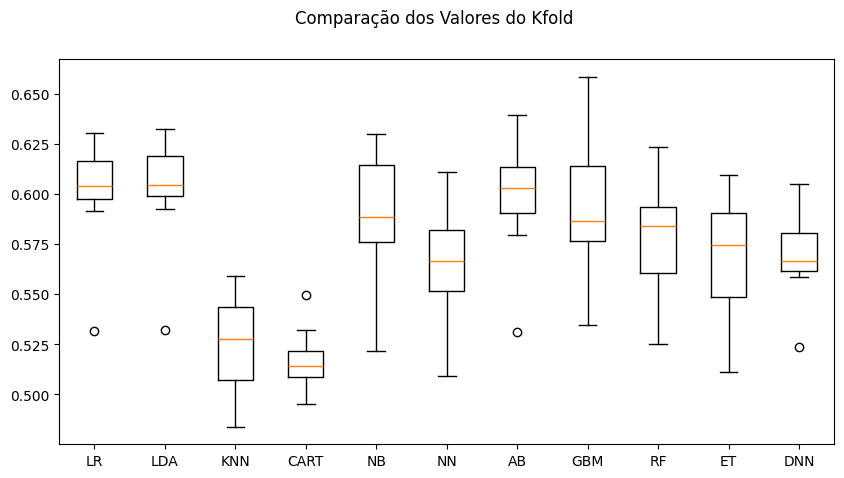

In [182]:
# comparando resultados da validação cruzada
# quanto maior o cross_val_score o modelo é mais consistente e generalizável
fig = pyplot.figure()
fig.suptitle('Comparação dos Valores do Kfold')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(10,5)
pyplot.show()

- Um valor maior de cross_val_score geralmente sugere que o modelo se adapta melhor aos dados e apresenta um desempenho superior na validação cruzada. 
- LASSO E ElasticNet (EN) apresentaram o melhor resultado do kfold, então seriam até agora os escolhidos baseados nessa avaliação.

In [ ]:
# Grid Search: Ajuste do GradientBoosting 
n_estimators = [20,180] 
max_depth= [3,5]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth) 
model = GradientBoostingClassifier() 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(X_train, Y_train) 
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# resultados com o conjunto de teste
model = GradientBoostingClassifier(max_depth= 5, n_estimators= 180) 
model.fit(X_train, Y_train) 

# estimar acurácia do conjunto de validação 
predictions = model.predict(X_validation) 
print(accuracy_score(Y_validation, predictions))

In [ ]:
# importância da variável do modelo treinado
print(model.feature_importances_) 

#usar clase incorporada de importância dos features
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 

#plotar gráfico de importância de features para melhor visualização 
feat_importances.nlargest(10).plot(kind='barh') pyplot.show()

## Faz o Deploy do Modelo

In [183]:
# faz o deploy do modelo para ser utilizado posteriormente
from joblib import dump

dump(modelx, 'model/LR_emprestimo.pkl')

['model/LR_emprestimo.pkl']